*import pandas, requests and matplotlib module*

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt


*Create function to construct the JSON data with the desired key-value pairs*

In [ ]:
def create_json(df):
    """
    Create a JSON-formatted dictionary from a Pandas DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame containing OHLC data.

    Returns:
        dict: A JSON-formatted dictionary with the OHLC data.
    """
    # Check if the DataFrame has more than 10,000 rows
    if len(df) > 10000:
        # If the DataFrame has more than 10,000 rows, return an error message
        return {"Error": "Genesis has a current limit of 10000 OHLC periods."}
    else:
        # Create an empty dictionary to store the OHLC data
        data = {}

        # Iterate over each row in the DataFrame
        for idx, row in df.iterrows():
            # Get the index of the current row plus 1 as the key
            key = idx + 1

            # Create a nested dictionary for the current row
            data[f'P{key}'] = {
                'Datetime': row['Datetime'],
                'Open': row['Open'],
                'High': row['High'],
                'Low': row['Low'],
                'Close': row['Close']
            }

        # Return the dictionary containing the OHLC data
        return data


*Import Tesla's hourly price data with the following columns: Datetime, Open, High, Low & Close.*

In [ ]:
df = pd.read_csv("data/TSLA_1h_data.csv")

We want to predict Tesla's price trend on April 26th at 16:00 so we append a row onto the dataframe.

In [ ]:
new_row = pd.Series({'Datetime': '2024-04-26 16:00:00', 'Open': 0, 'High': 0.0, 'Low': 0.0, 'Close': 0})

# Concatenate the new row to the existing DataFrame
df = pd.concat([df, new_row.to_frame().T], ignore_index=True)

# Check the new row has been added
print(df.tail(5))

                Datetime        Open        High         Low       Close
437  2024-04-26 12:30:00  171.369995  172.029007  170.759995  170.949997
438  2024-04-26 13:30:00  170.940002  170.979996  168.070007  168.309998
439  2024-04-26 14:30:00  168.320007  168.470001  166.369995  167.585297
440  2024-04-26 15:30:00  167.565002  168.679993  166.919998  168.289993
441  2024-04-26 16:00:00           0         0.0         0.0           0


*Call the create_json function with the input DataFrame 'df' and store the resulting JSON-formatted dictionary in the 'json_data' variable*

In [ ]:
json_data = create_json(df)

*Add API_key obtained from sumtyme.ai to the json dictionary.*

In [ ]:
json_data.update({"API_KEY":"API_PROVIDED_BY_SUMTYME_AI"})


*Make a POST request to the the Genesis API.*

In [ ]:
url = "https://sumtyme-ai.azurewebsites.net/api/genesis/v1"

response = requests.post(url, json=json_data)

print(response)

<Response [200]>


*Parse response content as JSON data and convert to Pandas Dataframe.*

In [ ]:
data = response.json()

genesis_forecast = pd.DataFrame.from_dict(data, orient='index')

genesis_forecast = genesis_forecast.reset_index()

genesis_forecast = genesis_forecast.rename(columns={'index': 'Datetime'})


*Plot actual close price removing the additional row added for April 26th.*

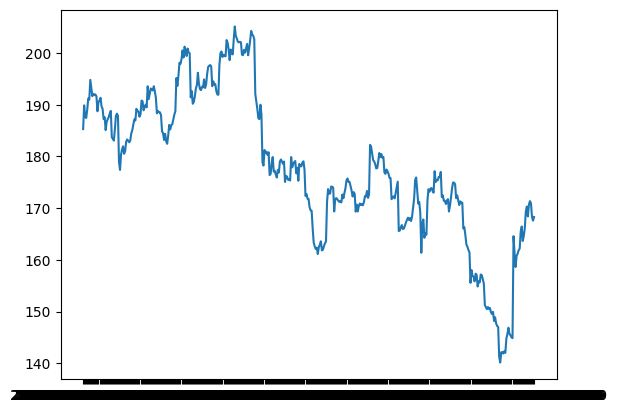

In [ ]:
df = df.iloc[:-1]

x = df['Datetime']
y = df['Close']

plt.plot(x, y)


*Plot Genesis Forecast*

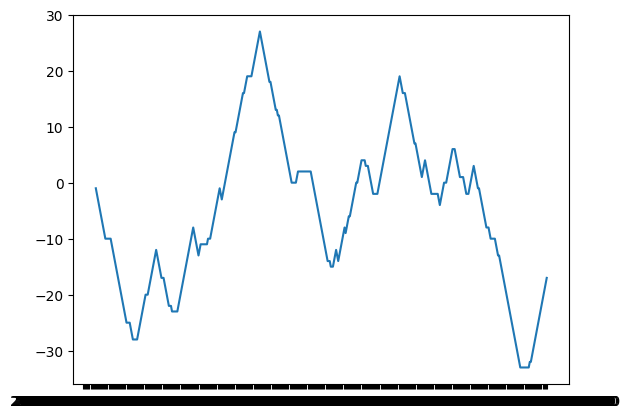

In [ ]:
x1 = genesis_forecast['Datetime']
y1 = genesis_forecast['model_forecast_cumulative_plot']

plt.plot(x1, y1)
